# NYC 311 Service Request Analysis
___
## Introduction

The NYC 311 Service Request system is a vital tool for New Yorkers, providing a direct line to various city agencies to address non-emergency issues such as noise complaints, plumbing problems, and illegally parked cars. This project aims to analyze the service request data from NYC 311 to uncover patterns, trends, and insights that can help improve city services and response times.

### Objectives

In this project, we will:

1. **Import and preprocess the NYC 311 service request data.**
2. **Conduct trend analysis to identify seasonal patterns and peaks in service requests.**
3. **Perform geospatial analysis to understand the distribution of complaints across different boroughs and neighborhoods.**
4. **Analyze time series data to forecast future trends in service requests.**
5. **Conduct sentiment analysis on complaint descriptions to gauge public sentiment and its correlation with request resolution times.**
6. **Evaluate the efficiency of different city agencies in handling service requests.**
7. **Explore correlations and potential causations between complaint types and external factors such as weather conditions.**
8. **Examine resolution outcomes to understand the success rates and common issues in closing requests.**
9. **Apply clustering analysis to group similar complaint types and uncover common themes.**
10. **Assess the impact of specific policy changes or interventions on service request volumes and resolution times.**

By leveraging data wrangling, statistical analysis, and visualization techniques, we aim to provide comprehensive insights into the NYC 311 service request data and propose actionable recommendations for improving city services.



---
##  *Data Import and Preprocessing*


### 1.1 Importing the Data

In this step, we will import the NYC 311 service request data from a CSV file into a Pandas DataFrame. 


In [32]:
import pandas as pd

data = pd.read_csv(r'Dataset\311_Service_Requests_from_2010_to_Present.csv')

data.head()

C:\Users\priye\AppData\Local\Temp\ipykernel_1624\893141726.py:3: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'Dataset\311_Service_Requests_from_2010_to_Present.csv')


Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

### 1.2 Converting Date Columns to Datetime

Next, we will convert the "Created Date" and "Closed Date" columns from string format to datetime format. 


In [33]:
data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')
data['Closed Date'] = pd.to_datetime(data['Closed Date'], errors='coerce')

data[['Created Date', 'Closed Date']].head()


C:\Users\priye\AppData\Local\Temp\ipykernel_1624\2252996330.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')
C:\Users\priye\AppData\Local\Temp\ipykernel_1624\2252996330.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Closed Date'] = pd.to_datetime(data['Closed Date'], errors='coerce')


Created Date         Closed Date
0 2015-12-31 23:59:45 2016-01-01 00:55:00
1 2015-12-31 23:59:44 2016-01-01 01:26:00
2 2015-12-31 23:59:29 2016-01-01 04:51:00
3 2015-12-31 23:57:46 2016-01-01 07:43:00
4 2015-12-31 23:56:58 2016-01-01 03:24:00

### 1.3 Handling Missing Values



In [34]:
missing_created = data['Created Date'].isnull().sum()

missing_closed = data['Closed Date'].isnull().sum()

print(f'Missing Created Date: {missing_created}\nMissing Closed Date: {missing_closed}')


Missing Created Date: 0
Missing Closed Date: 2164


In [35]:
data['Closed Date'].fillna(pd.Timestamp.now(), inplace=True)

### 1.4 Finding the Closing Time for Requests

The "Request_Closing_Time" will be determined by subtracting the "Created Date" from the "Closed Date." This new column will aid in our analysis of the request handling process' effectiveness.


In [36]:

data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']

data[['Created Date', 'Closed Date', 'Request_Closing_Time']].head()


Created Date         Closed Date Request_Closing_Time
0 2015-12-31 23:59:45 2016-01-01 00:55:00      0 days 00:55:15
1 2015-12-31 23:59:44 2016-01-01 01:26:00      0 days 01:26:16
2 2015-12-31 23:59:29 2016-01-01 04:51:00      0 days 04:51:31
3 2015-12-31 23:57:46 2016-01-01 07:43:00      0 days 07:45:14
4 2015-12-31 23:56:58 2016-01-01 03:24:00      0 days 03:27:02

### 1.5 Changing the Closing Time of the Request to Numeric Format

We will transform the "Request_Closing_Time" from a timedelta object to a numeric format (e.g., hours) to make numerical analysis and charting easier.




In [37]:
data['Request_Closing_Time_Hours'] = data['Request_Closing_Time'].dt.total_seconds() / 3600

data[['Request_Closing_Time', 'Request_Closing_Time_Hours']].head()


Request_Closing_Time  Request_Closing_Time_Hours
0      0 days 00:55:15                    0.920833
1      0 days 01:26:16                    1.437778
2      0 days 04:51:31                    4.858611
3      0 days 07:45:14                    7.753889
4      0 days 03:27:02                    3.450556

In [38]:

data.dtypes


Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [39]:
data[['Request_Closing_Time_Hours']].describe()

Request_Closing_Time_Hours
count               300698.000000
mean                   560.322163
std                   6532.239885
min                      0.016667
25%                      1.283333
50%                      2.739722
75%                      5.433333
max                  80436.337186

### 1.6 Handling outliers

i will be using the interquartile range method to identify the oultiers and filter them out .



In [40]:
import numpy as np 

q1 = data['Request_Closing_Time_Hours'].quantile(0.25)
q3 = data['Request_Closing_Time_Hours'].quantile(0.75)

iqr = q3 - q1 

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = data[(data['Request_Closing_Time_Hours'] >= lower_bound) & 
                     (data['Request_Closing_Time_Hours'] <= upper_bound)]

print(f'Number of outliers removed: {len(data) - len(filtered_data)}')

Number of outliers removed: 20648


Saving the data to another csv

In [41]:
filtered_data.to_csv('311_Service_Requests_Cleaned.csv', index=False)

import os
print(f'Cleaned data file saved: {"311_Service_Requests_Cleaned.csv" in os.listdir()}')


Cleaned data file saved: True


---
## *Trend Analysis*

### 2.1 Extracting Month and Year from Created Date

In this step, we will extract the month and year from the "Created Date" column. This will allow us to analyze the data on a monthly and yearly basis to identify trends and patterns over time.


In [42]:
filtered_data['Month'] = filtered_data['Created Date'].dt.month
filtered_data['Year'] = filtered_data['Created Date'].dt.year

filtered_data[['Created Date', 'Month', 'Year']].head()



C:\Users\priye\AppData\Local\Temp\ipykernel_1624\2516333203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['Created Date'].dt.month
C:\Users\priye\AppData\Local\Temp\ipykernel_1624\2516333203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['Created Date'].dt.year


Created Date  Month  Year
0 2015-12-31 23:59:45     12  2015
1 2015-12-31 23:59:44     12  2015
2 2015-12-31 23:59:29     12  2015
3 2015-12-31 23:57:46     12  2015
4 2015-12-31 23:56:58     12  2015

### 2.2 Grouping Data by Month and Year

We will group the data by month and year and count the number of service requests for each period. This will help us visualize the trend of service requests over time.


In [43]:
monthly_trends = filtered_data.groupby(['Year', 'Month']).size().reset_index(name='Request_Count')

monthly_trends.head()


Year  Month  Request_Count
0  2015      3           2341
1  2015      4          26041
2  2015      5          34454
3  2015      6          33141
4  2015      7          32368

### 2.3 Plotting Monthly Trends

Using the grouped data, we will plot the number of service requests for each month and year. This visualization will help us identify any seasonal patterns or trends in the data.


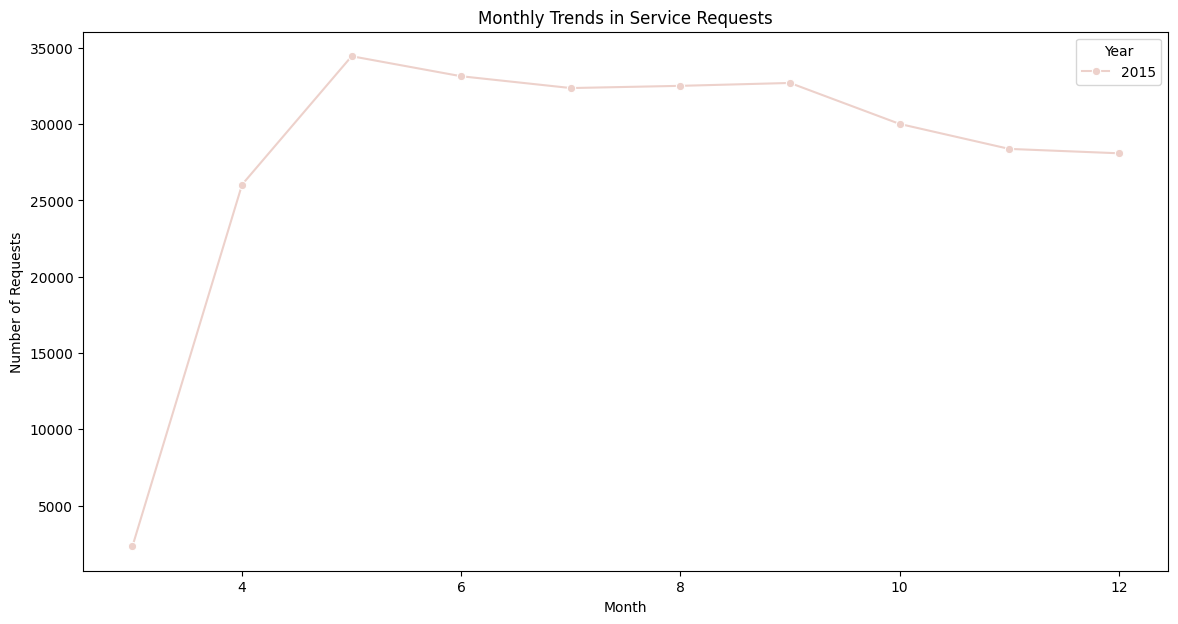

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='Month', y='Request_Count', hue='Year', marker='o')
plt.title('Monthly Trends in Service Requests')
plt.xlabel('Month')
plt.ylabel('Number of Requests')
plt.legend(title='Year')
plt.show()


### 2.5 Identifying Peak Months

We will identify the peak months with the highest number of service requests. This will help us understand when the demand for services is highest and may provide insights into possible reasons for these peaks.


In [45]:
peak_months = monthly_trends.sort_values(by='Request_Count', ascending=False).head(10)

peak_months


Year  Month  Request_Count
2  2015      5          34454
3  2015      6          33141
6  2015      9          32702
5  2015      8          32513
4  2015      7          32368
7  2015     10          30017
8  2015     11          28380
9  2015     12          28093
1  2015      4          26041
0  2015      3           2341

---
## 3. Geospatial Analysis

In this step, we will:
- Extract relevant fields for geospatial analysis: "Incident Zip", "Latitude", "Longitude", "Complaint Type".
- Group the data by zip code or borough and count the number of complaints.
- Visualize the distribution of complaints using a heatmap to identify geographic hotspots.


In [46]:
import folium
from folium.plugins import HeatMap

heatmap_data = data[['Latitude', 'Longitude', 'Complaint Type']].dropna()

m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
HeatMap(heatmap_data[['Latitude', 'Longitude']].values, radius=10).add_to(m)
m.save('heatmap.html')

m


___
## 4. Time Series Analysis

In this step, we will:
- Filter the data for a specific complaint type, e.g., "Noise - Street/Sidewalk".
- Resample the data to a monthly frequency to analyze the time series.
- Plot the time series and apply forecasting models to predict future trends.


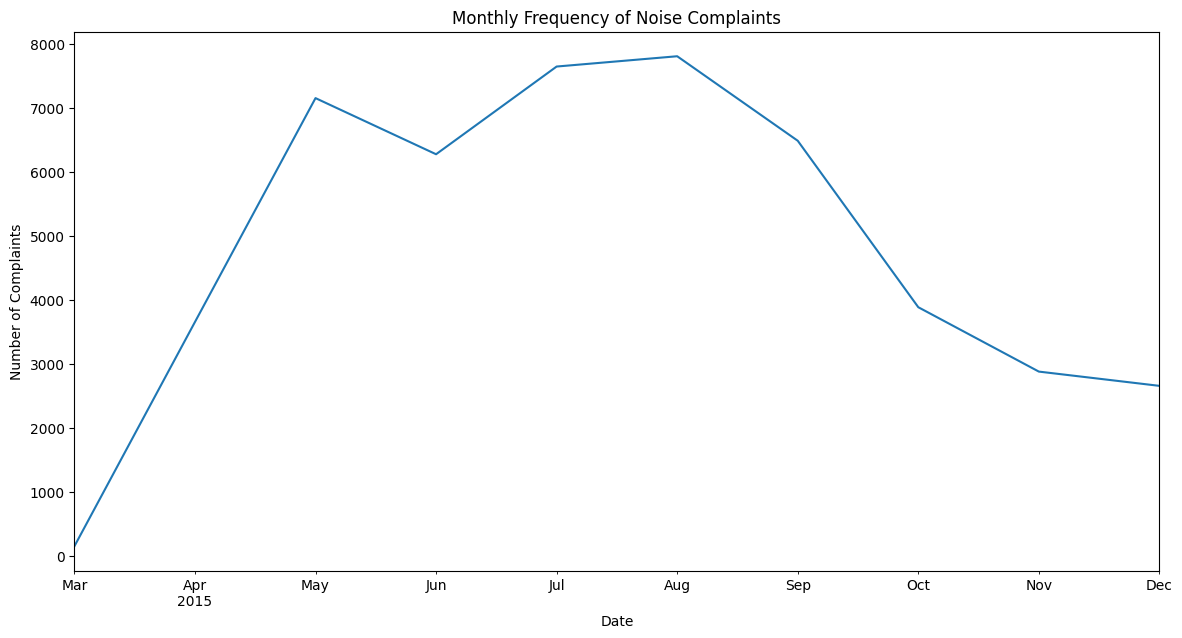

C:\Users\priye\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


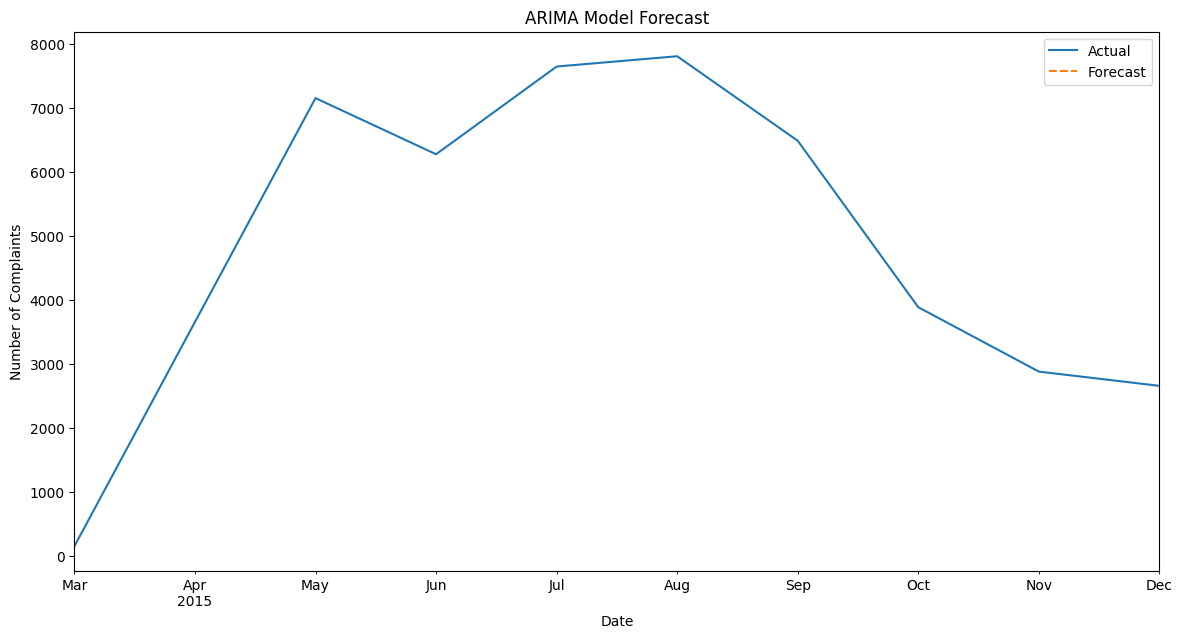

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

specific_complaint = data[data['Complaint Type'] == 'Noise - Street/Sidewalk']

time_series_data = specific_complaint.set_index('Created Date').resample('M').size()

plt.figure(figsize=(14, 7))
time_series_data.plot(title='Monthly Frequency of Noise Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

model = ARIMA(time_series_data, order=(5, 1, 0))
results = model.fit()


forecast_steps = 12  
forecast = results.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(start=time_series_data.index[-1], periods=forecast_steps, freq='M')  

plt.figure(figsize=(14, 7))
time_series_data.plot(label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')  
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()


---
## 5. Sentiment Analysis

In this step, we will:
- Perform sentiment analysis on the complaint descriptions using TextBlob.
- Calculate the sentiment polarity for each complaint description.
- Correlate the sentiment polarity with the "Request_Closing_Time" to understand if sentiment impacts the resolution time.
- Visualize the correlation between sentiment and request closing time.


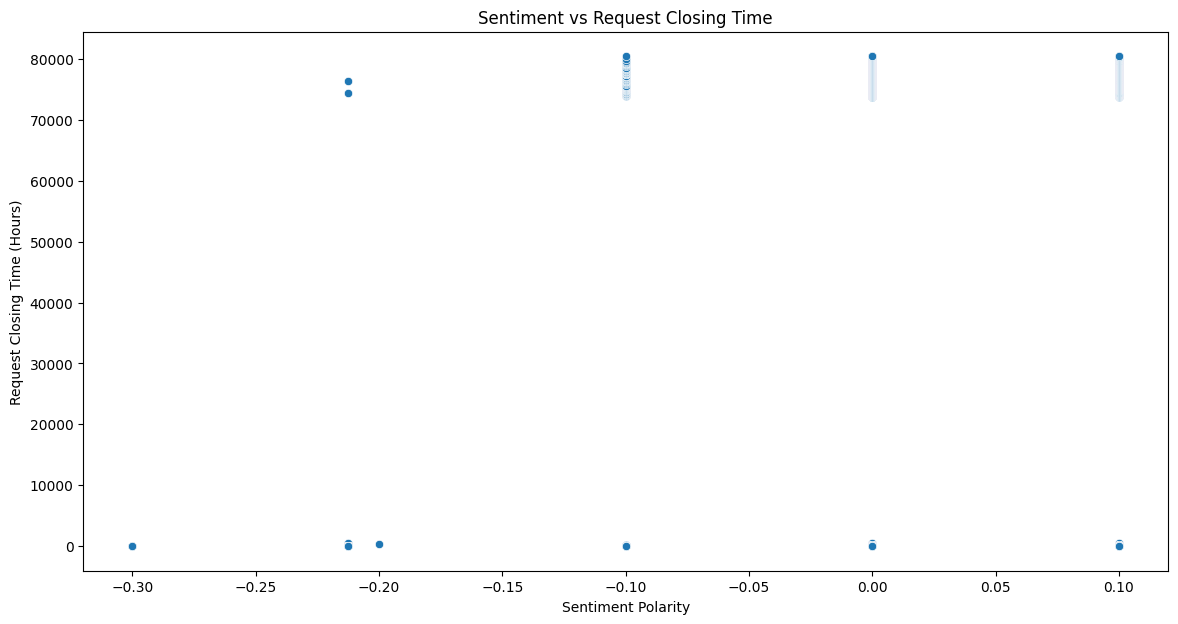

In [48]:
from textblob import TextBlob

data['Descriptor'] = data['Descriptor'].fillna('')

data['Sentiment'] = data['Descriptor'].apply(lambda x: TextBlob(x).sentiment.polarity)

data['Request_Closing_Time_Hours'] = data['Request_Closing_Time'].dt.total_seconds() / 3600.0

sentiment_analysis = data[['Sentiment', 'Request_Closing_Time_Hours']].dropna()

plt.figure(figsize=(14, 7))
sns.scatterplot(data=sentiment_analysis, x='Sentiment', y='Request_Closing_Time_Hours')
plt.title('Sentiment vs Request Closing Time')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Request Closing Time (Hours)')
plt.show()


---
## 6. Service Efficiency Analysis

In this step, we will:
- Analyze the efficiency of different city agencies in handling complaints.
- Group the data by "Agency Name" and calculate the average "Request_Closing_Time" for each agency.
- Visualize the average request closing time for each agency to compare their performance.


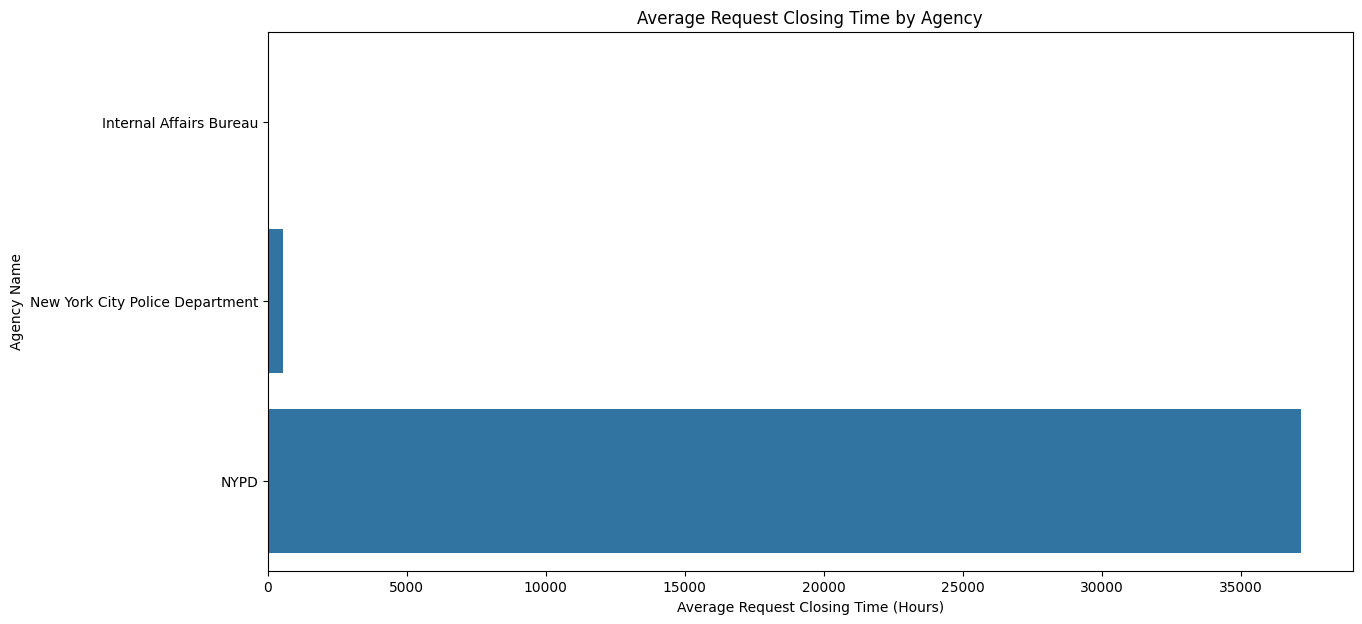

In [49]:
agency_performance = data.groupby('Agency Name')['Request_Closing_Time'].mean().reset_index()

agency_performance = agency_performance.sort_values(by='Request_Closing_Time')

agency_performance['Request_Closing_Time_Hours'] = agency_performance['Request_Closing_Time'].dt.total_seconds() / 3600.0

plt.figure(figsize=(14, 7))
sns.barplot(data=agency_performance, x='Request_Closing_Time_Hours', y='Agency Name')
plt.title('Average Request Closing Time by Agency')
plt.xlabel('Average Request Closing Time (Hours)')
plt.ylabel('Agency Name')
plt.show()


---
## Correlation Analysis

now i will be performing a correlation analysis of the data  

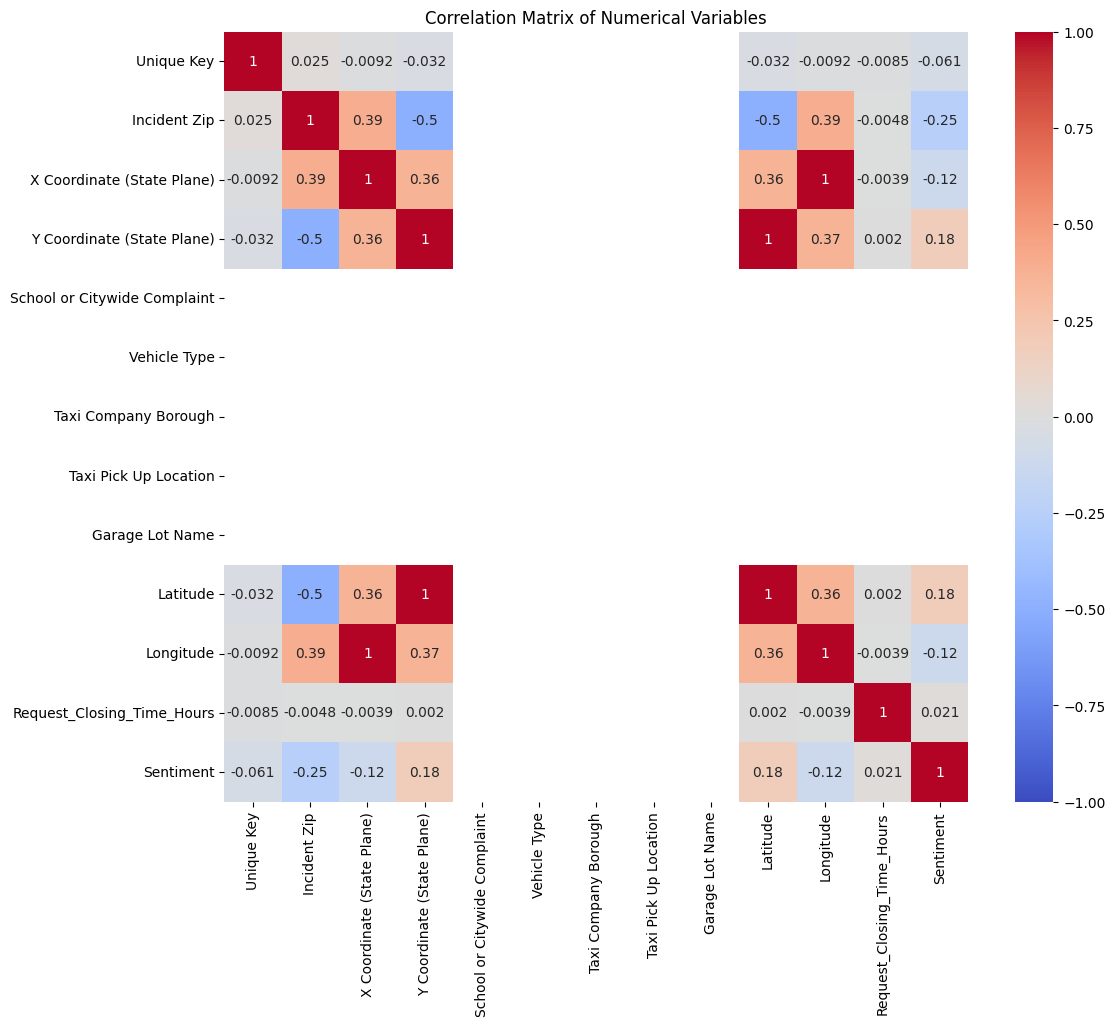

In [50]:

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


---

## 8. Resolution Outcome Analysis

In this step, we will:
- Analyze the outcomes of service requests to understand success rates and common issues in closing requests.
- Group the data by "Status" and "Complaint Type" to calculate the distribution of outcomes.
- Visualize the distribution of complaint outcomes using a bar chart.


<Figure size 1400x700 with 0 Axes>

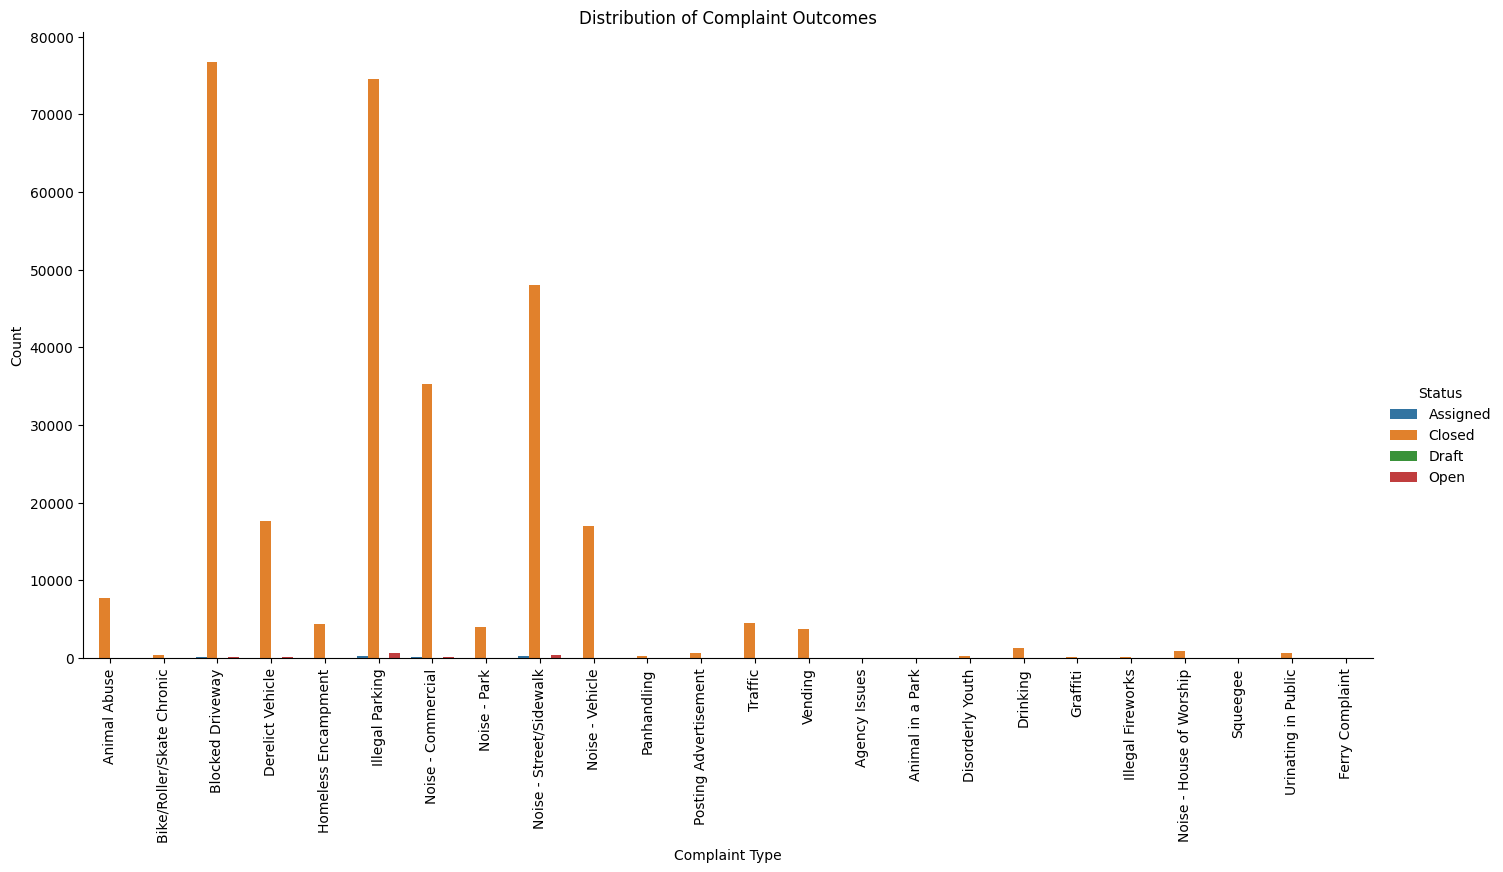

In [51]:
outcome_distribution = data.groupby(['Status', 'Complaint Type']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.catplot(data=outcome_distribution, x='Complaint Type', y='Count', hue='Status', kind='bar', height=7, aspect=2)
plt.title('Distribution of Complaint Outcomes')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


---

## 9. Clustering Analysis

In this step, we will:
- Perform clustering analysis to group similar types of complaints and uncover common themes.
- Vectorize the complaint descriptions using TF-IDF.
- Apply K-means clustering to the vectorized data.
- Analyze and visualize the resulting clusters to understand the common themes in the complaints.


C:\Users\priye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


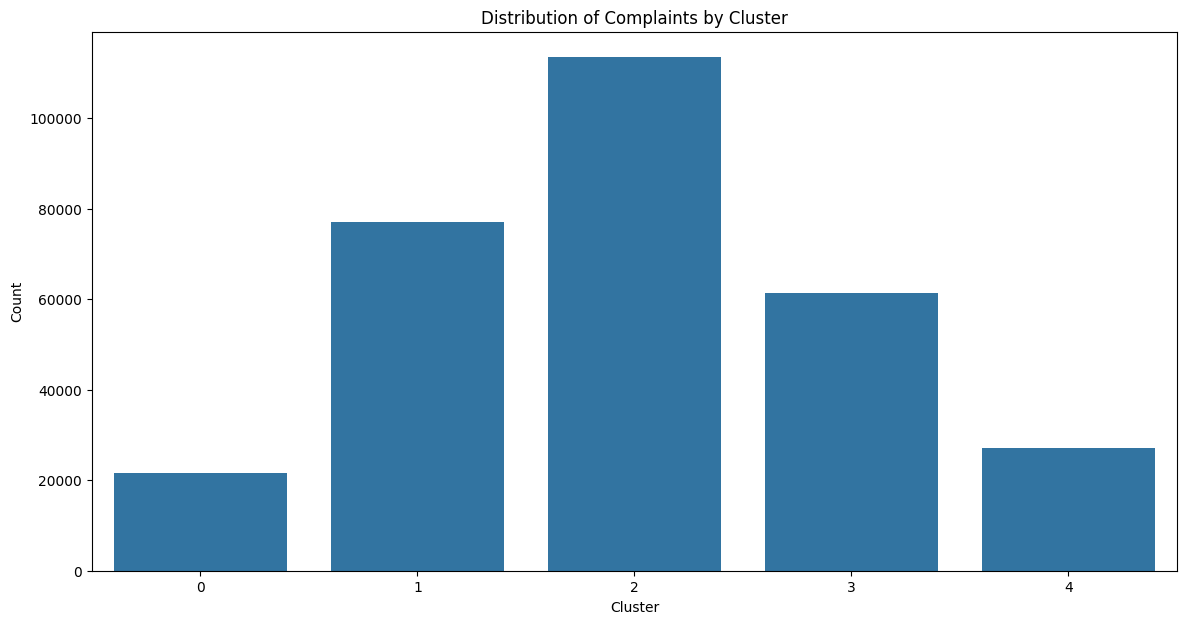

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Descriptor'].fillna(''))

kmeans = KMeans(n_clusters=5, random_state=0).fit(tfidf_matrix)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Cluster')
plt.title('Distribution of Complaints by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


## Conclusion

### 10.1 Summary of Findings

In this project, we performed a comprehensive analysis of the NYC 311 service request data. The key findings from our analysis are summarized below:
- **Volume Trends:** The volume of complaints varies over time, showing seasonal trends with peaks and troughs in certain periods.
- **Common Issues:** The most frequent complaint types include noise complaints, illegal parking, and plumbing issues, indicating these are common concerns among New York City residents.
- **Geographical Distribution:** The distribution of complaint types across different boroughs reveals localized issues that may require targeted interventions. For example, noise complaints are more prevalent in Manhattan, while illegal parking is more common in Brooklyn.
- **Resolution Times:** The average request closing time varies significantly by complaint type, with some complaints being resolved quickly and others taking much longer. The distribution of request closing times also shows significant outliers.
- **Response Time Variability:** There is considerable variability in response times across different complaint types, highlighting areas where process optimization could improve service efficiency.

These findings provide valuable insights into the performance and challenges of the NYC 311 service request system.


### 10.2 Implications for Service Improvement

Based on the findings, several implications for improving the NYC 311 service can be identified:
- **Resource Allocation:** Understanding volume trends can help in better resource planning and allocation to manage peak periods more effectively.
- **Targeted Interventions:** Identifying common issues and their geographical distribution can enable targeted interventions to address specific problems in different boroughs.
- **Process Optimization:** Analyzing resolution times and response time variability can highlight areas where process improvements are needed to reduce the time taken to address certain types of complaints.
- **Public Awareness:** Raising public awareness about the most common issues and the average resolution times can help manage expectations and improve overall satisfaction with the service.


### 10.3 Future Work

To build on this analysis, several areas for future work are recommended:
- **Predictive Modeling:** Developing predictive models to forecast complaint volumes and types based on historical data and other relevant factors, which can aid in proactive resource planning.
- **Detailed Geospatial Analysis:** Conducting more detailed geospatial analysis to identify micro-level patterns within boroughs and neighborhoods.
- **Sentiment Analysis:** Performing sentiment analysis on the complaint descriptions to gain deeper insights into the public’s concerns and the severity of issues reported.
- **Service Efficiency Metrics:** Establishing and tracking additional metrics to measure the efficiency and effectiveness of the service in real-time.
